## Objective

In this scenario, the consequences of false negatives outweigh those of false positives. Overlooking positive reviews could lead to missed insights and growth opportunities, making false negatives more harmful. Therefore, a suitable value of β for the Fβ score, such as β = 2, emphasizes high recall, ensuring positive sentiments are adequately captured.

In [305]:
import re
import turicreate as tc
import matplotlib.pyplot as plt

#### Question 2

In [306]:
# make a list of stopwords (this list is too short)
stopwords = ['the', 'and']

In [307]:
# Function cleans a single review.
def clean_text(reivew):

    # remove html tags
    reivew = re.sub('<.{1,4}>', '', reivew)
    
    # remove punctuation reivew
    reivew = re.sub('[^\w^\s\n]', ' ', reivew)
    
    # remove numbers
    reivew = re.sub("\d", "", reivew)
    
    # make everything lowercase
    reivew = reivew.lower()
    
    # remove words with one to two characters
    reivew = re.sub('\\b\w{1,2}\\b', '', reivew)
    
    #remove stopwords
    for word in stopwords:
        reivew = re.sub('\\b' + word + '\\b', '', reivew)
    
    return reivew

In [308]:
# Load the csv to dataframe
df = tc.SFrame('IMDB_Dataset.csv')

Finished parsing file /home/wma2/SupervisedML/Assignment 4/IMDB_Dataset.csv

Parsing completed. Parsed 100 lines in 0.365338 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 39624 lines. Lines per second: 53781

Finished parsing file /home/wma2/SupervisedML/Assignment 4/IMDB_Dataset.csv

Parsing completed. Parsed 50000 lines in 0.851158 secs.

In [310]:
# applying the clean_text() function to each row of the SFrame and 
# replace the 'cleaned' data to the dataframe review column
df['review'] = df.apply(lambda x: clean_text(x['review']))

#### Question 3

In [311]:
df

review,sentiment
one other reviewers hasmentioned that after ...,positive
wonderful littleproduction filming ...,positive
thought this waswonderful way spend ...,positive
basically there familywhere little boy jake ...,negative
petter mattei lovetime money visually ...,positive
probably all timefavorite movie story ...,positive
sure would like seeresurrection dated ...,positive
this show was amazingfresh innovative idea ...,negative
encouraged positivecomments about this film ...,negative
you like original gutwrenching laughter you ...,positive


In [312]:
# counting words and adding word-count dictionary to SFrame
df['words'] = tc.text_analytics.count_words(df['review'])

In [313]:
# Output the updated SFrame
df

review,sentiment,words
one other reviewers hasmentioned that after ...,positive,"{'darker': 1.0, 'touch':1.0, 'thats': 1.0, ..."
wonderful littleproduction filming ...,positive,"{'terribly': 1.0,'surface': 1.0, ..."
thought this waswonderful way spend ...,positive,"{'great': 1.0, 'see':1.0, 'risk': 1.0, ..."
basically there familywhere little boy jake ...,negative,"{'them': 1.0, 'ignore':1.0, 'dialogs': 1.0, ..."
petter mattei lovetime money visually ...,positive,"{'work': 1.0, 'for': 1.0,'anxiously': 1.0, ..."
probably all timefavorite movie story ...,positive,"{'for': 1.0, 'dozen':1.0, 'startling': 1.0, ..."
sure would like seeresurrection dated ...,positive,"{'then': 1.0, 'doubt':1.0, 'out': 1.0, 'lin ..."
this show was amazingfresh innovative idea ...,negative,"{'awful': 1.0, 'just':1.0, 'now': 1.0, ..."
encouraged positivecomments about this film ...,negative,"{'obsessives': 1.0,'effort': 1.0, 'bit': ..."
you like original gutwrenching laughter you ...,positive,"{'mom': 1.0, 'hell': 1.0,'great': 1.0, 'love': ..."


#### Question 4

In [314]:
#Splitting data into training, validation & Testing set
# 80% Training 10% Validation and 10% Testing
train, validate = df.random_split(0.8, seed=0, exact=True)
validate, test = validate.random_split(0.5, seed=0, exact=True)

In [315]:
# Display Results
print("Training data rows: ", train.num_rows())
print("Validation data rows: ", validate.num_rows())
print("Testing data rows: ", test.num_rows())

Training data rows:  40000
Validation data rows:  5000
Testing data rows:  5000


#### Question 5

In [316]:
# applied perceptron model to train model_1 dataset
perceptron_model_1 = tc.logistic_classifier.create(train, target='sentiment', features=['words'], validation_set=validate)


Logistic regression:

--------------------------------------------------------

Number of examples          : 40000

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 93236

Number of coefficients      : 93237

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 2        | 1.000000  | 0.096170     | 0.923825          | 0.855800            |

| 1         | 4        | 1.000000  | 0.221748     | 0.942300          | 0.845800            |

| 2         | 6        | 0.793056  | 0.339807     | 0.972700          | 0.880000            |

| 3         | 7        | 0.991320  | 0.419125     | 0.981825          | 0.887000            |

| 4         | 8        | 1.000000  | 0.499016     | 0.988825          | 0.889600            |

| 9         | 13       | 1.000000  | 0.908695     | 0.999675          | 0.863600            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

In [317]:
# applied perceptron model to train model_2 dataset using different hyperparameters
perceptron_model_2 = tc.logistic_classifier.create(train, target='sentiment', features=['words'], validation_set=validate, step_size=1.0,
                                       l1_penalty=0.5,l2_penalty=0.5, max_iterations=500, convergence_threshold=0.001)

Logistic regression:

--------------------------------------------------------

Number of examples          : 40000

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 93236

Number of coefficients      : 93237

Starting Accelerated Gradient (FISTA)

--------------------------------------------------------

Tuning step size. First iteration could take longer than subsequent iterations.

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 1        | 1.000000  | 0.051489     | 0.498125          | 0.503800            |

| 1         | 2        | 0.000008  | 1.409271     | 0.923800          | 0.855800            |

| 2         | 3        | 0.000008  | 1.525625     | 0.962425          | 0.879800            |

| 3         | 4        | 0.000008  | 1.644352     | 0.959500          | 0.866400            |

| 4         | 5        | 0.000002  | 1.889293     | 0.976325          | 0.889600            |

| 5         | 6        | 0.000002  | 2.004030     | 0.978575          | 0.891000            |

| 10        | 11       | 0.000002  | 2.597146     | 0.984725          | 0.890000            |

| 20        | 21       | 0.000002  | 3.825069     | 0.991425          | 0.889000            |

| 30        | 31       | 0.000002  | 5.011400     | 0.994850          | 0.887800            |

| 40        | 41       | 0.000002  | 6.210937     | 0.996875          | 0.885800            |

| 50        | 51       | 0.000002  | 7.439990     | 0.997850          | 0.884000            |

| 60        | 61       | 0.000002  | 8.678279     | 0.998425          | 0.881800            |

| 70        | 71       | 0.000002  | 9.910062     | 0.998950          | 0.881000            |

| 80        | 81       | 0.000002  | 11.130709    | 0.999225          | 0.879800            |

| 90        | 91       | 0.000002  | 12.317416    | 0.999450          | 0.879400            |

| 100       | 101      | 0.000002  | 13.520496    | 0.999500          | 0.878800            |

| 110       | 111      | 0.000002  | 14.738109    | 0.999625          | 0.877600            |

| 120       | 121      | 0.000002  | 15.938251    | 0.999650          | 0.877000            |

| 130       | 131      | 0.000002  | 17.188576    | 0.999750          | 0.877200            |

| 140       | 141      | 0.000002  | 18.450544    | 0.999800          | 0.877600            |

| 150       | 151      | 0.000002  | 19.677452    | 0.999875          | 0.877800            |

| 160       | 161      | 0.000002  | 20.894970    | 0.999900          | 0.877600            |

| 170       | 171      | 0.000002  | 22.140212    | 0.999950          | 0.876800            |

| 180       | 181      | 0.000002  | 23.386543    | 0.999950          | 0.877600            |

| 190       | 191      | 0.000002  | 24.609400    | 0.999950          | 0.877000            |

| 200       | 201      | 0.000002  | 25.843294    | 0.999950          | 0.878000            |

| 210       | 211      | 0.000002  | 27.043871    | 0.999975          | 0.878400            |

| 220       | 221      | 0.000002  | 28.236893    | 0.999975          | 0.877800            |

| 230       | 231      | 0.000002  | 29.449553    | 0.999975          | 0.878200            |

| 240       | 241      | 0.000002  | 30.675573    | 1.000000          | 0.877600            |

| 250       | 251      | 0.000002  | 31.889745    | 1.000000          | 0.877600            |

| 260       | 261      | 0.000002  | 33.095129    | 1.000000          | 0.878000            |

| 270       | 271      | 0.000002  | 34.291743    | 1.000000          | 0.877600            |

| 280       | 281      | 0.000002  | 35.523449    | 1.000000          | 0.877400            |

| 290       | 291      | 0.000002  | 36.764700    | 1.000000          | 0.877200            |

| 300       | 301      | 0.000002  | 37.973269    | 1.000000          | 0.877600            |

| 310       | 311      | 0.000002  | 39.188483    | 1.000000          | 0.877800            |

| 320       | 321      | 0.000002  | 40.444437    | 1.000000          | 0.876800            |

| 330       | 331      | 0.000002  | 41.678925    | 1.000000          | 0.876200            |

| 340       | 341      | 0.000002  | 42.870386    | 1.000000          | 0.877000            |

| 350       | 351      | 0.000002  | 44.069576    | 1.000000          | 0.876400            |

| 360       | 361      | 0.000002  | 45.287490    | 1.000000          | 0.876600            |

| 370       | 371      | 0.000002  | 46.495551    | 1.000000          | 0.877200            |

| 380       | 381      | 0.000002  | 47.716025    | 1.000000          | 0.877000            |

| 390       | 391      | 0.000002  | 48.939611    | 1.000000          | 0.877800            |

| 400       | 401      | 0.000002  | 50.179635    | 1.000000          | 0.878800            |

| 410       | 411      | 0.000002  | 51.395887    | 1.000000          | 0.878200            |

| 420       | 421      | 0.000002  | 52.592103    | 1.000000          | 0.878400            |

| 430       | 431      | 0.000002  | 53.799664    | 1.000000          | 0.877800            |

| 440       | 441      | 0.000002  | 55.052409    | 1.000000          | 0.878000            |

| 450       | 451      | 0.000002  | 56.276309    | 1.000000          | 0.878000            |

| 460       | 461      | 0.000002  | 57.475419    | 1.000000          | 0.877000            |

| 470       | 471      | 0.000002  | 58.691602    | 1.000000          | 0.876400            |

| 480       | 481      | 0.000002  | 59.935354    | 1.000000          | 0.876600            |

| 490       | 491      | 0.000002  | 61.175600    | 1.000000          | 0.876400            |

| 500       | 501      | 0.000002  | 62.441266    | 1.000000          | 0.877000            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

Completed (Iteration limit reached).

This model may not be optimal. To improve it, consider increasing `max_iterations`.

#### Question 6a

In [318]:
# Evaluate the model 1 accuracy using training and validation dataset
train_accuracy1 = perceptron_model_1.evaluate(train)['accuracy']
validation_accuracy1 = perceptron_model_1.evaluate(validate)['accuracy']

# Evaluate the model 2 accuracy using traing and validation dataset
train_accuracy2 = perceptron_model_2.evaluate(train)['accuracy']
validation_accuracy2 = perceptron_model_2.evaluate(validate)['accuracy']

In [319]:
# Output the training and validation accuracies for both models
print("Model 1:")
print("Training Accuracy:", train_accuracy1)
print("Validation Accuracy:", validation_accuracy1)

print("\nModel 2:")
print("Training Accuracy:", train_accuracy2)
print("Validation Accuracy:", validation_accuracy2)

Model 1:
Training Accuracy: 0.999675
Validation Accuracy: 0.8636

Model 2:
Training Accuracy: 1.0
Validation Accuracy: 0.877


### Question 6b

In [320]:
# Get the predictions for the validation set
predictions1 = perceptron_model_1.predict(validate)
predictions2 = perceptron_model_2.predict(validate)

# Get confusion matrixs using the true labels from the validation set and the predicted labels for each model 
conf_matrix1 = tc.evaluation.confusion_matrix(validate['sentiment'], predictions1)
conf_matrix2 = tc.evaluation.confusion_matrix(validate['sentiment'], predictions2)

In [321]:
# Output the confusion matrices
print("Model 1 Confusion Matrix:")
print(conf_matrix1)
print("=======================================================================")
print("Model 2 Confusion Matrix:")
print(conf_matrix2)

Model 1 Confusion Matrix:
+--------------+-----------------+-------+
| target_label | predicted_label | count |
+--------------+-----------------+-------+
|   negative   |     negative    |  2152 |
|   positive   |     negative    |  353  |
|   positive   |     positive    |  2166 |
|   negative   |     positive    |  329  |
+--------------+-----------------+-------+
[4 rows x 3 columns]

Model 2 Confusion Matrix:
+--------------+-----------------+-------+
| target_label | predicted_label | count |
+--------------+-----------------+-------+
|   negative   |     negative    |  2164 |
|   negative   |     positive    |  317  |
|   positive   |     negative    |  298  |
|   positive   |     positive    |  2221 |
+--------------+-----------------+-------+
[4 rows x 3 columns]



### Question 6c

In [322]:
#-- Model 1--
# Check if there is true positive records
check_true_positive1 = conf_matrix1[(conf_matrix1['target_label'] == "positive") & (conf_matrix1['predicted_label'] == "positive")]
# extracting the counts of true positive from the confusion matrix, based on the target and predicted labels.
if len(check_true_positive1) == 0:
    true_positive1 = 0
else:
    true_positive1 = conf_matrix1[(conf_matrix1['target_label'] == "positive") & (conf_matrix1['predicted_label'] == "positive")]['count'][0]


# Check if there is false positives records
check_false_positive1 = conf_matrix1[(conf_matrix1['target_label'] == "negative") & (conf_matrix1['predicted_label'] == "positive")]
# extracting the counts of false positives from the confusion matrix, based on the target and predicted labels.
if len(check_false_positive1) == 0:
    false_positive1 = 0
else:
    false_positive1 = conf_matrix1[(conf_matrix1['target_label'] == "negative") & (conf_matrix1['predicted_label'] == "positive")]['count'][0]

    
# Check if there is false negative records
check_false_negative1 = conf_matrix1[(conf_matrix1['target_label'] == "positive") & (conf_matrix1['predicted_label'] == "negative")]
# extracting the counts of false negative from the confusion matrix, based on the target and predicted labels.
if len(check_false_negative1) == 0:
    false_negative1 = 0
else:
    false_negative1 = conf_matrix1[(conf_matrix1['target_label'] == "positive") & (conf_matrix1['predicted_label'] == "negative")]['count'][0]



# Get the Precision Value
precision1 = true_positive1 / (true_positive1 + false_positive1)

# Get the Recall Value
recall1 = true_positive1 / (true_positive1 + false_negative1)

# Get the f_beta_score
f_beta_score1 = (1 + 2**2) * (precision1 * recall1) / ((2**2 * precision1) + recall1)

#-- Model 2--
# Check if there is true positive records
check_true_positive2 = conf_matrix2[(conf_matrix2['target_label'] == "positive") & (conf_matrix2['predicted_label'] == "positive")]
# extracting the counts of true positive from the confusion matrix, based on the target and predicted labels.
if len(check_true_positive2) == 0:
    true_positive2 = 0
else:
    true_positive2 = conf_matrix2[(conf_matrix2['target_label'] == "positive") & (conf_matrix2['predicted_label'] == "positive")]['count'][0]


# Check if there is false positives records
check_false_positive2 = conf_matrix2[(conf_matrix2['target_label'] == "negative") & (conf_matrix2['predicted_label'] == "positive")]
# extracting the counts of false positives from the confusion matrix, based on the target and predicted labels.
if len(check_false_positive2) == 0:
    false_positive2 = 0
else:
    false_positive2 = conf_matrix2[(conf_matrix2['target_label'] == "negative") & (conf_matrix2['predicted_label'] == "positive")]['count'][0]

    
# Check if there is false negative records
check_false_negative2 = conf_matrix2[(conf_matrix2['target_label'] == "positive") & (conf_matrix2['predicted_label'] == "negative")]
# extracting the counts of false negative from the confusion matrix, based on the target and predicted labels.
if len(check_false_negative2) == 0:
    false_negative2 = 0
else:
    false_negative2 = conf_matrix2[(conf_matrix2['target_label'] == "positive") & (conf_matrix2['predicted_label'] == "negative")]['count'][0]


# Get the Precision Value
precision2 = true_positive2 / (true_positive2 + false_positive2)

# Get the Recall Value
recall2 = true_positive2 / (true_positive2 + false_negative2)

# Get the f_beta_score
f_beta_score2 = (1 + 2**2) * (precision2 * recall2) / ((2**2 * precision2) + recall2)

In [323]:
# Output recall, precision, and Fβ score for both models
print("Model 1:")
print("Recall:", recall1)
print("Precision:", precision1)
print("Fβ Score:", f_beta_score1)

print("\nModel 2:")
print("Recall:", recall2)
print("Precision:", precision2)
print("Fβ Score:", f_beta_score2)


Model 1:
Recall: 0.8598650258038905
Precision: 0.8681362725450902
Fβ Score: 0.8615066422718957

Model 2:
Recall: 0.8816990869392616
Precision: 0.8750985027580772
Fβ Score: 0.8803710163310607


### Question 6d

In [324]:
# For Model 1
# Prediction probability for model perceptron_model_1 for the validation data
prediction_prob_1 = perceptron_model_1.predict(validate, output_type='probability')

In [325]:
# Evaluate the ROC for model 1 using validation dataset
roc_data =  tc.evaluation.roc_curve(validate['sentiment'], prediction_prob_1)

In [326]:
# Display the first and the last 10 records of roc data using validation dataset
display(roc_data.head())
display(roc_data.tail())

threshold,fpr,tpr,p,n
0.0,1.0,1.0,2519,2481
0.001,0.5090689238210399,0.9718142119888845,2519,2481
0.002,0.46997178557033453,0.9686383485510123,2519,2481
0.003,0.4417573559048771,0.9646685192536721,2519,2481
0.004,0.42241031841999194,0.963080587534736,2519,2481
0.005,0.40588472390165253,0.9618896387455339,2519,2481
0.006,0.39500201531640466,0.9606986899563319,2519,2481
0.007,0.38855300282144295,0.9591107582373958,2519,2481
0.008,0.3792825473599355,0.9583167923779278,2519,2481
0.009,0.37525191455058443,0.9575228265184597,2519,2481


threshold,fpr,tpr,p,n
0.991,0.03466344216041919,0.5883287018658198,2519,2481
0.992,0.03466344216041919,0.5831679237792775,2519,2481
0.993,0.032648125755743655,0.575228265184597,2519,2481
0.994,0.031035872632003223,0.5645097260817785,2519,2481
0.995,0.029423619508262798,0.5529972211194919,2519,2481
0.996,0.02781136638452237,0.5355299722111949,2519,2481
0.997,0.02418379685610641,0.5129019452163557,2519,2481
0.998,0.02176541717049577,0.48630408892417626,2519,2481
0.999,0.017331721080209594,0.4406510520047638,2519,2481
1.0,0.0,0.0,2519,2481


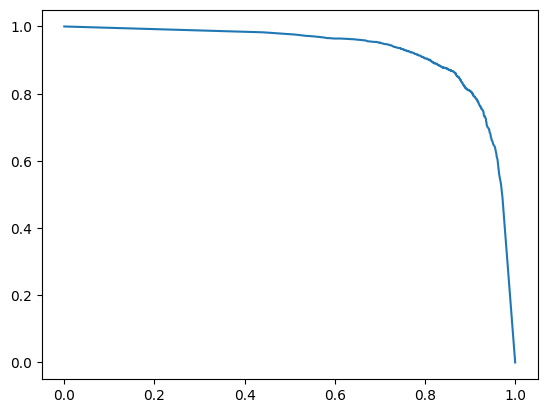

In [327]:
# Plot the ROC curve for model 1 using validation dataset
roc_x = roc_data['tpr']
roc_y = 1 - roc_data['fpr']
plt.plot(roc_x, roc_y)

In [328]:
# Evaluate the AUC for model 1 using validation dataset
auc =  tc.evaluation.auc(validate['sentiment'], prediction_prob_1)

# Output the AUC for model 1 using validation dataset
auc

0.9211218439977106

In [329]:
# For Model 2
# Prediction probability for model perceptron_model_2 for the validation data
prediction_prob_2 = perceptron_model_2.predict(validate, output_type='probability')

In [330]:
# Evaluate the ROC for model 2 using validation dataset
roc_data =  tc.evaluation.roc_curve(validate['sentiment'], prediction_prob_2)

In [331]:
# Display the first and the last 10 records of roc data
display(roc_data.head())
display(roc_data.tail())

threshold,fpr,tpr,p,n
0.0,1.0,1.0,2519,2481
0.001,0.47642079806529625,0.9761810242159588,2519,2481
0.002,0.44135429262394194,0.9737991266375546,2519,2481
0.003,0.41152760983474407,0.9698292973402144,2519,2481
0.004,0.3966142684401451,0.9682413656212783,2519,2481
0.005,0.38492543329302703,0.9654624851131401,2519,2481
0.006,0.37122128174123337,0.964271536323938,2519,2481
0.007,0.3611446997178557,0.963874553394204,2519,2481
0.008,0.3538895606610238,0.963080587534736,2519,2481
0.009,0.34784361144699716,0.963080587534736,2519,2481


threshold,fpr,tpr,p,n
0.991,0.03385731559854897,0.6637554585152838,2519,2481
0.992,0.03385731559854897,0.6542278682016673,2519,2481
0.993,0.032245062474808545,0.6435093290988487,2519,2481
0.994,0.03143893591293833,0.6331877729257642,2519,2481
0.995,0.030229746070133012,0.6216752679634776,2519,2481
0.996,0.027408303103587262,0.6085748312822549,2519,2481
0.997,0.024989923417976623,0.591901548233426,2519,2481
0.998,0.023377670294236194,0.5680825724493846,2519,2481
0.999,0.01894397420395002,0.5307661770543867,2519,2481
1.0,0.0,0.0,2519,2481


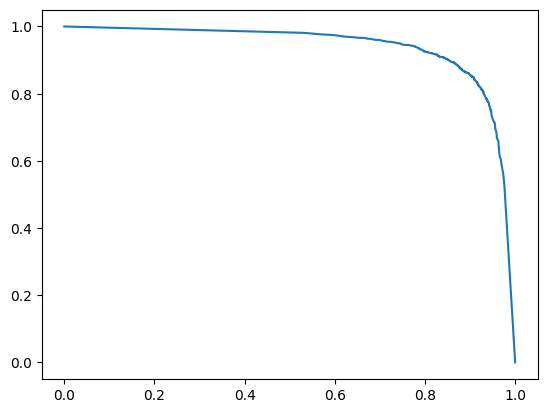

In [332]:
# Plot the ROC curve for model 2 using validation dataset
roc_x = roc_data['tpr']
roc_y = 1 - roc_data['fpr']
plt.plot(roc_x, roc_y)

In [333]:
# Evaluate the AUC for model 2 using validation dataset
auc =  tc.evaluation.auc(validate['sentiment'], prediction_prob_2)

# Output the AUC for model 2 using validation dataset
auc

0.9327753971069355

### Question 7

Considering the overall performance and the trade-off between precision and recall, we would select Model 2 as our best model for the following reasons:

1. Higher Recall: Model 2 has a slightly higher recall, indicating that it captures more positive instances from the total actual positives. This is crucial in applications where it's essential to minimize false negatives (missing positive instances).

2. Higher Precision: Model 2 has a slightly higher precision, incdicating that the model produces few false positives

Both models have high F-beta score, indicating a good balance between precision and recall. The model is accurate in classifying positive instances correctly.  But Model 2 is slightly higher comparing to model 1

Base on our analysis, the confusion matrix have been reviewed to show additional insights into our models' performance, especially regarding false positives and false negatives regarding this use case. 

Therefore, based on the considerations above, we would select Model 2 as the best model for this task. 

### Question 8a

In [334]:
# Evaluate the model 2 accuracy using testing dataset
test_accuracy = perceptron_model_2.evaluate(test)['accuracy']

# Output the testing dataset accuracy
print("Model 2:")
print("Testing Accuracy:", test_accuracy)

Model 2:
Testing Accuracy: 0.8838


### Question 8b

In [335]:
# Get the predictions for the testing dataset
predictions_test = perceptron_model_2.predict(test)

# Get confusion matrixs using the true labels from the testing set and the predicted labels for each model 
conf_matrix_test = tc.evaluation.confusion_matrix(test['sentiment'], predictions_test)


In [336]:
# Display the confusion matrices
print("Model 2 (Test) Confusion Matrix:")
print(conf_matrix_test)

Model 2 (Test) Confusion Matrix:
+--------------+-----------------+-------+
| target_label | predicted_label | count |
+--------------+-----------------+-------+
|   negative   |     negative    |  2118 |
|   positive   |     positive    |  2301 |
|   positive   |     negative    |  255  |
|   negative   |     positive    |  326  |
+--------------+-----------------+-------+
[4 rows x 3 columns]



### Question 8c

In [337]:
#-- Model 2 (Test)--
# Check if there is true positive records
check_true_positive_test = conf_matrix_test[(conf_matrix_test['target_label'] == "positive") & (conf_matrix_test['predicted_label'] == "positive")]
# extracting the counts of true positive from the confusion matrix, based on the target and predicted labels.
if len(check_true_positive_test) == 0:
    true_positive_test = 0
else:
    true_positive_test = conf_matrix_test[(conf_matrix_test['target_label'] == "positive") & (conf_matrix_test['predicted_label'] == "positive")]['count'][0]


# Check if there is false positives records
check_false_positive_test = conf_matrix_test[(conf_matrix_test['target_label'] == "negative") & (conf_matrix_test['predicted_label'] == "positive")]
# extracting the counts of false positives from the confusion matrix, based on the target and predicted labels.
if len(check_false_positive_test) == 0:
    false_positive_test = 0
else:
    false_positive_test = conf_matrix_test[(conf_matrix_test['target_label'] == "negative") & (conf_matrix_test['predicted_label'] == "positive")]['count'][0]

    
# Check if there is false negative records
check_false_negative_test = conf_matrix_test[(conf_matrix_test['target_label'] == "positive") & (conf_matrix_test['predicted_label'] == "negative")]
# extracting the counts of false negative from the confusion matrix, based on the target and predicted labels.
if len(check_false_negative_test) == 0:
    false_negative_test = 0
else:
    false_negative_test = conf_matrix_test[(conf_matrix_test['target_label'] == "positive") & (conf_matrix_test['predicted_label'] == "negative")]['count'][0]


# Get the Precision Value
precision_test = true_positive_test / (true_positive_test + false_positive_test)

# Get the Recall Value
recall_test = true_positive_test / (true_positive_test + false_negative_test)

# Get the f_beta_score
f_beta_score_test = (1 + 2**2) * (precision_test * recall2) / ((2**2 * precision_test) + recall_test)

In [338]:
# Output recall, precision, and Fβ score for both models
print("Model 2 (Test):")
print("Recall:", recall_test)
print("Precision:", precision_test)
print("Fβ Score:", f_beta_score_test)

Model 2 (Test):
Recall: 0.9002347417840375
Precision: 0.8759040730871717
Fβ Score: 0.8768278212655639


### Question 8d

In [339]:
# For Model 2 (Test)
# Prediction probability for model perceptron_model_2 for the validation data
prediction_prob_test = perceptron_model_2.predict(test, output_type='probability')

In [340]:
# Evaluate the ROC 
roc_data =  tc.evaluation.roc_curve(test['sentiment'], prediction_prob_test)

In [341]:
# Display the first and the last 10 records of roc data
display(roc_data.head())
display(roc_data.tail())

threshold,fpr,tpr,p,n
0.0,1.0,1.0,2556,2444
0.001,0.4627659574468085,0.9878716744913928,2556,2444
0.002,0.42839607201309327,0.9843505477308294,2556,2444
0.003,0.40384615384615385,0.9823943661971831,2556,2444
0.004,0.39075286415711946,0.9816118935837246,2556,2444
0.005,0.37684124386252044,0.9796557120500783,2556,2444
0.006,0.36620294599018005,0.9780907668231612,2556,2444
0.007,0.35801963993453356,0.9769170579029735,2556,2444
0.008,0.352291325695581,0.9757433489827856,2556,2444
0.009,0.34779050736497547,0.974960876369327,2556,2444


threshold,fpr,tpr,p,n
0.991,0.03764320785597381,0.6713615023474179,2556,2444
0.992,0.035597381342062195,0.6651017214397497,2556,2444
0.993,0.035597381342062195,0.6564945226917058,2556,2444
0.994,0.03477905073649754,0.647887323943662,2556,2444
0.995,0.032324058919803604,0.6365414710485133,2556,2444
0.996,0.032324058919803604,0.6232394366197183,2556,2444
0.997,0.029869067103109655,0.6028951486697965,2556,2444
0.998,0.027414075286415714,0.5805946791862285,2556,2444
0.999,0.0220949263502455,0.5414710485133021,2556,2444
1.0,0.0,0.0,2556,2444


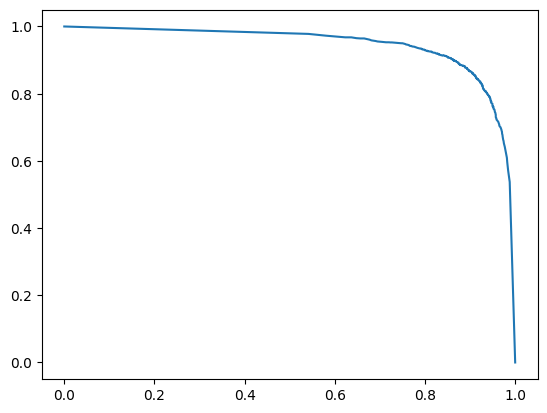

In [342]:
# Plot the ROC curve
roc_x = roc_data['tpr']
roc_y = 1 - roc_data['fpr']
plt.plot(roc_x, roc_y)

In [343]:
# Evaluate the AUC
auc =  tc.evaluation.auc(test['sentiment'], prediction_prob_test)

# Output the AUC
auc

0.9381372797614936